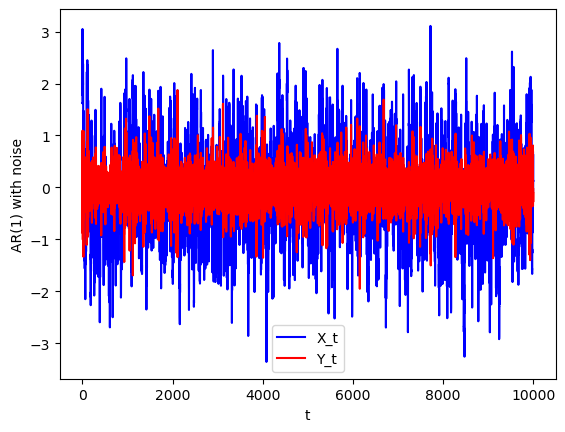

In [1]:
#This file contains numerical implementation in section 5.2 in the
# paper and should be supplement by the file 'class_SV.py'.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import time
from class_SV import SV

def RMSE(thetalist,theta_true):
    rmselist=(np.mean((thetalist-theta_true[:,None])**2,axis=0))**.5
    return(rmselist)

#SV model
T=10000
phi=0.9
sigmax=0.4
sigmay=.25
sigma0=(1-phi**2)**-0.5*sigmax
theta=np.array([phi,sigmax,sigmay])

np.random.seed(0)#0
X_true=[np.random.normal(0,sigma0)]
for t in range(T-1):   
    X_true.append(X_true[-1]*phi+np.random.normal(0,sigmax))
Y=np.random.normal(0,sigmay*np.exp(np.array(X_true)/2))
plt.plot(X_true,color='b',label='X_t')
plt.plot(Y,color='r',label='Y_t')
plt.xlabel("t")
plt.ylabel("AR(1) with noise")
plt.legend()    
N=1000
phi0=.7
sigmax0=.25
sigmay0=.4
theta0=np.array([phi0,sigmax0,sigmay0])
c1=0.00005#c1*T=0.5
c2=0.05
A=100
alpha=1
gamma=1/6
S=20
S=1
model=SV(Y)

[0.89563701 0.39946762 0.24273486]


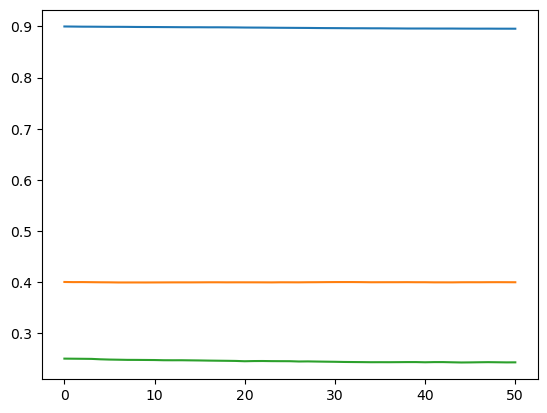

In [2]:
#Using FGA starting at the true theta to find mle, from the trace plot we belive that 
# the mle(which is quite close to the true value) has been found
N=1000
I=50
np.random.seed(0)
model.FGA(theta,c1,A,alpha,I,N)
plt.plot(model.thetalist);
print(model.thetalist[-1])
theta_mle=model.thetalist[-1]#theta_mle=np.array([0.89563701, 0.39946762, 0.24273486])

In [5]:
#NGA
N=1000
I=10
S=20
comp_time=0
thetas_seeds=np.zeros([S,3,I+1])
for s in range(S):
    np.random.seed(s)
    start=time.perf_counter()
    model.NGA(theta0,c1,c2,A,alpha,gamma,I,N)
    end=time.perf_counter()
    comp_time+=end-start
    thetas_seeds[s]=model.thetalist.T

rmselist=RMSE(thetas_seeds,theta_mle)
print('time=',comp_time, 'RMSE=',rmselist[:,-1])
#plt.plot(rmselist.T)
#plt.plot(model.thetalist);


time= 1124.4328967997571 RMSE= [0.21137139 0.20122136 0.15931689]


In [6]:
#FGA
I=20
S=20
comp_time=0
thetas_seeds=np.zeros([S,3,I+1])
for s in range(S):
    np.random.seed(s)
    start=time.perf_counter()
    model.FGA(theta0,c1,A,alpha,I,N)
    #model.FGA2(theta0,I,N)
    end=time.perf_counter()
    comp_time+=end-start
    thetas_seeds[s]=model.thetalist.T

rmselist=RMSE(thetas_seeds,theta_mle)
print('time=',comp_time, 'RMSE=',rmselist[:,-1])
#plt.plot(rmselist.T)
#plt.plot(model.thetalist);

time= 1206.5853249998763 RMSE= [0.18227462 0.13399526 0.07052535]


In [7]:
#AdaptGA
I=20#35
r=.4
inner_K=130
S=20
comp_time=0
thetas_seeds=[[]]*S
thetas_last=np.zeros([S,3])
for s in range(S):
    np.random.seed(s)
    start=time.perf_counter()
    model.AGA(theta0,c1,A,alpha,I,N,r,inner_K)
    end=time.perf_counter()
    comp_time+=end-start
    #thetas_seeds[s]=model.thetalist
    thetas_last[s]=model.thetalist[-1]

#rmselist=RMSE(thetas_seeds[-1],theta_mle)
rmselist=RMSE(thetas_last[:,:,None],theta_mle)

thetas_seeds=np.array(thetas_seeds)
print('time=',comp_time, 'RMSE=',rmselist)
#plt.plot(model.thetalist);
#plt.plot(thetas_seeds.T);

time= 1233.0099168000743 RMSE= [[0.00703016]
 [0.06423301]
 [0.00376651]]


In [3]:
#onON^2
REP=1
S=20
N=30
comp_time=0
thetas_seeds=np.zeros([S,3,1+(T-1)*REP])
for s in range(S):
    np.random.seed(s)
    start=time.perf_counter()
    model.onON2(theta0,c1,A,alpha,N,REP)
    end=time.perf_counter()
    comp_time+=end-start
    thetas_seeds[s]=model.thetalist.T

rmselist=RMSE(thetas_seeds,theta_mle)
print('time=',comp_time, 'RMSE=',rmselist[:,-1])
#plt.plot(rmselist.T)
#plt.plot(model.thetalist);
print(model.thetalist[-1])

time= 1271.7049511000514 RMSE= [0.04643519 0.08010946 0.07874884]
[0.94938203 0.34885742 0.34078049]


In [10]:
#semiGA
#theta0=np.array([.6,.25,.4])
N=1000
REP=6
r1=.6
r2=1
S=20

renews=0
comp_time=0
thetas_seeds=[[]]*S
thetas_last=np.zeros([S,3])
for s in range(S):
    np.random.seed(s)
    start=time.perf_counter()   
    model.onGA1(theta0,c1,A,alpha,N,r1,r2,REP)  
    end=time.perf_counter()
    
    renews+=model.k1
    comp_time+=end-start
    thetas_seeds[s]=model.thetalist
    thetas_last[s]=model.thetalist[-1]

thetas_seeds=np.array(thetas_seeds)
#rmselist=RMSE(thetas_seeds[-1],theta_mle)
#rmselist=RMSE(thetas_last[:,None],theta_mle)
rmselist=RMSE(thetas_last[:,:,None],theta_mle)

print('time=',comp_time, 'RMSE=',rmselist)
#plt.plot(model.thetalist)
#print(model.thetalist[-1])
print(renews)

time= 1071.7533566000639 RMSE= [[0.01089179]
 [0.02122272]
 [0.00466101]]
2639
